# Load and Preprocess the Dataset

In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_excel('dataset.xlsx')

# Displaying the first few rows of the dataset 
print(df.head())


        Age  Gender                     Location   Country       City  \
0  Under 18  Female           Pakistan Islamabad  Pakistan  Islamabad   
1  Under 18  Female           Pakistan Islamabad  Pakistan  Islamabad   
2  Under 18  Female           Pakistan Islamabad  Pakistan  Islamabad   
3  Under 18  Female           Pakistan Islamabad  Pakistan  Islamabad   
4  Under 18  Female  Pakistan Islamabad Taramari  Pakistan  Islamabad   

  Shopping Habit Device for Shopping(Smart phone)  \
0         Rarely                       Smartphone   
1          Never                       Smartphone   
2         Rarely                       Smartphone   
3         Rarely                       Smartphone   
4          Never                              NaN   

  Device for Shopping(Desktop and Laptop)    Products(Clothing)  \
0                                     NaN                   NaN   
1                                     NaN  Clothing and Fashion   
2                                     NaN

# Handle Missing Values and Convert Categorical Data

In [2]:
# Initial preference columns
preferences = [
    'Shopping Habit', 
    'Device for Shopping(Smart phone)', 
    'Device for Shopping(Desktop and Laptop)', 
    'Products(Clothing)', 
    'Products(Electronics)', 
    'Products(Other)', 
    'Source Of Discvorey', 
    'Influencing Factors', 
    'Required Categories', 
    'Design Factors', 
    'Color Scheme'
]

# Verifying columns exist in the dataframe
existing_preferences = [col for col in preferences if col in df.columns]

# Log missing columns
missing_columns = set(preferences) - set(existing_preferences)
if missing_columns:
    print(f"Missing columns: {missing_columns}")

# Convert categorical columns to numeric codes
df[existing_preferences] = df[existing_preferences].apply(lambda x: x.astype('category').cat.codes)

# Impute missing values with a placeholder (e.g., -1)
df[existing_preferences] = df[existing_preferences].fillna(-1)

# Ensure Age column is numeric
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')


# Scale the Data and Perform K-Means Clustering

In [3]:
# Scale the data

scaler = StandardScaler()
df[existing_preferences] = scaler.fit_transform(df[existing_preferences])

# Perform k-means clustering on the whole dataset
kmeans = KMeans(n_clusters=9, random_state=42)
df['cluster'] = kmeans.fit_predict(df[existing_preferences])

# Calculate silhouette score to evaluate clustering accuracy
silhouette_avg = silhouette_score(df[existing_preferences], df['cluster'])
print(f"Silhouette Score: {silhouette_avg}")

Silhouette Score: 0.15818797510478583


# Save the K-Means Model

In [4]:
import joblib

# Save the scaler and K-Means model to files
joblib.dump(scaler, 'scaler.pkl')
joblib.dump(kmeans, 'kmeans_model.pkl')

['kmeans_model.pkl']

# Visualization by Age Group and Preferences

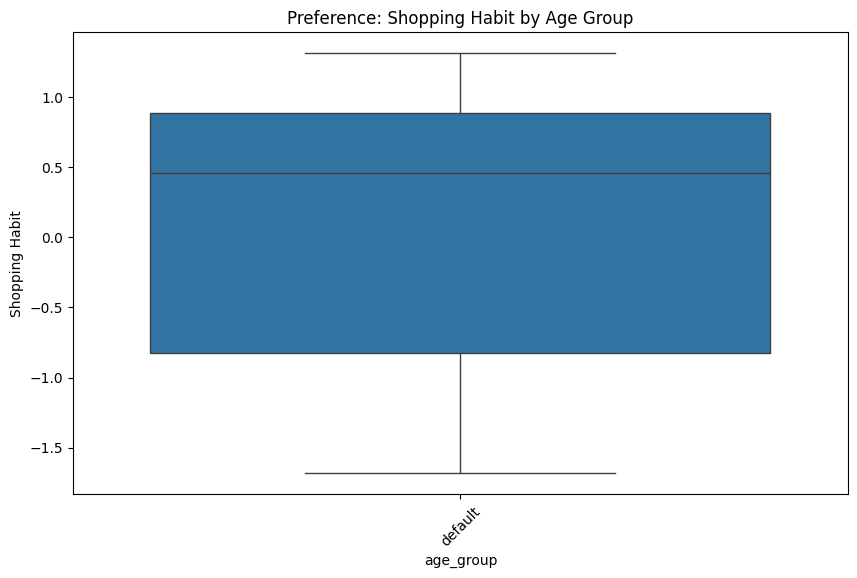

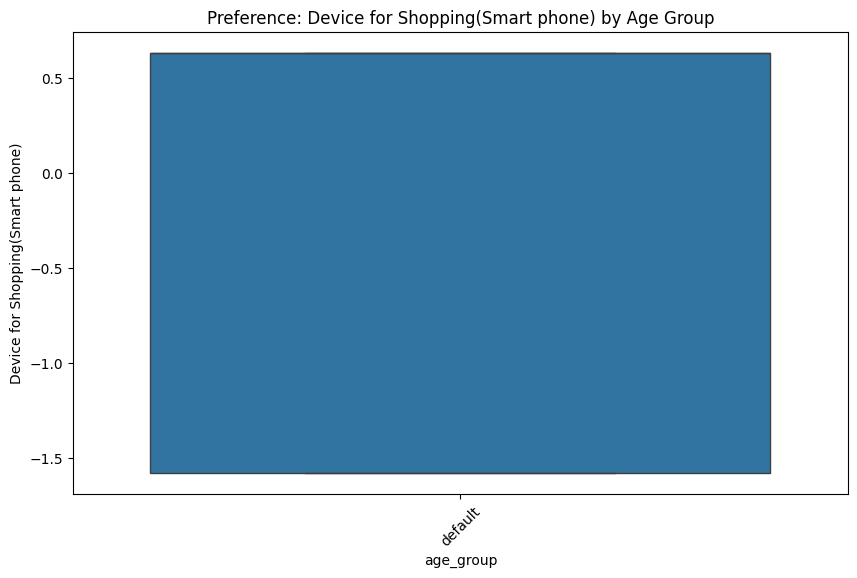

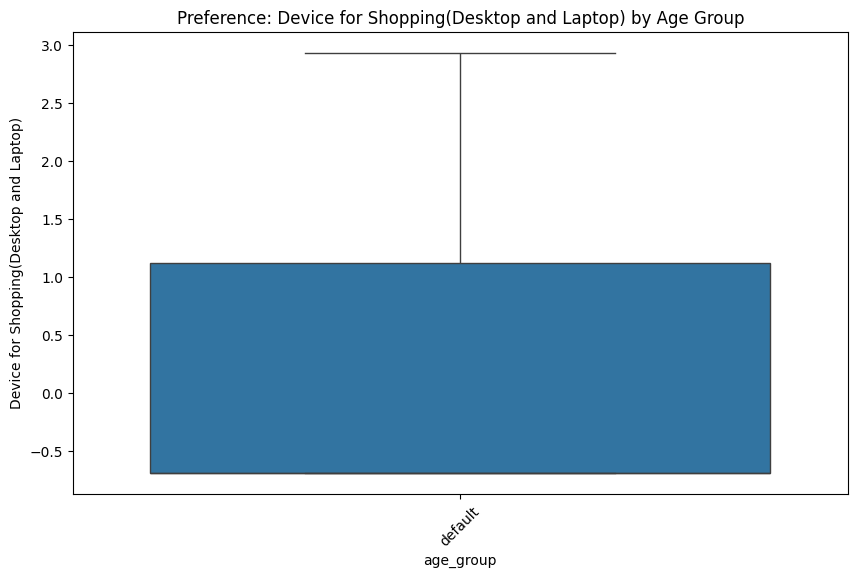

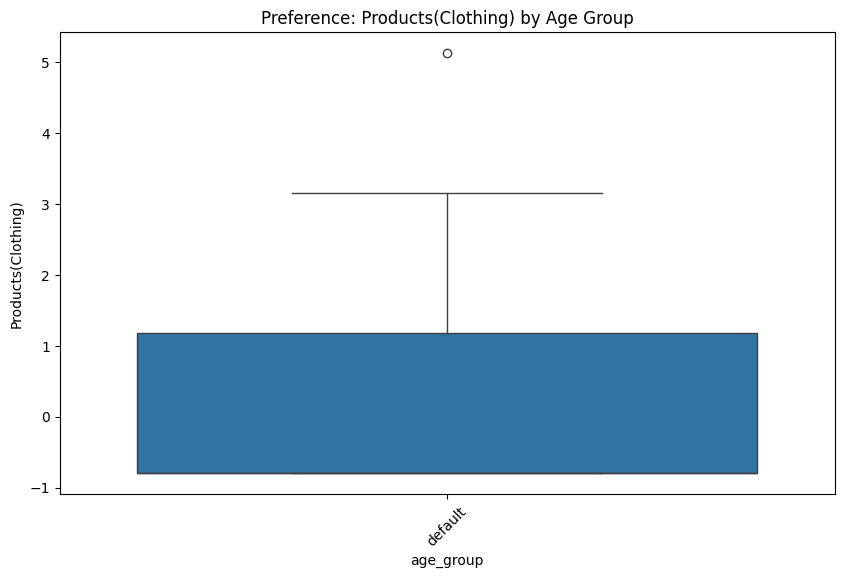

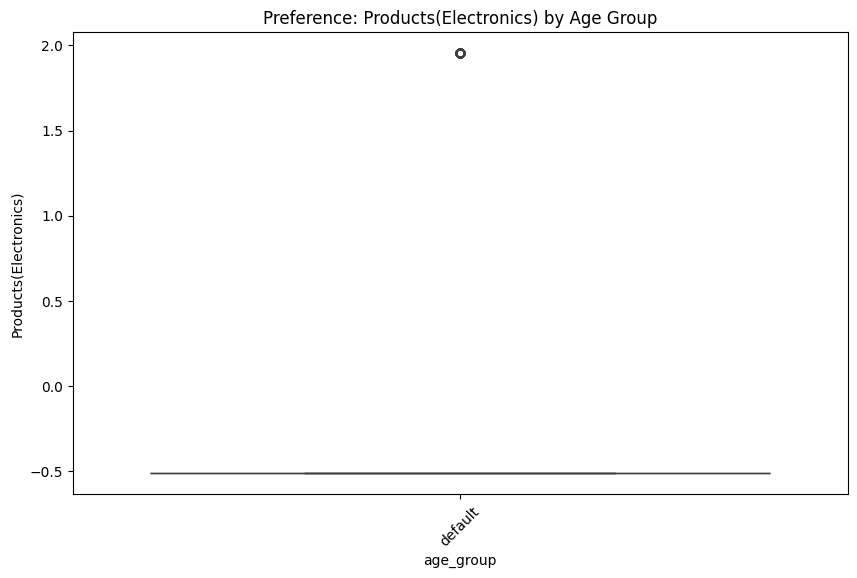

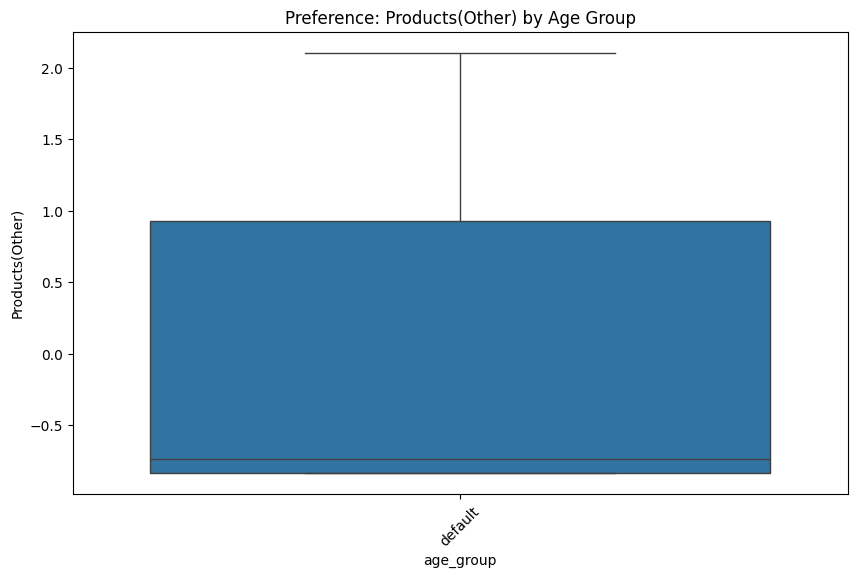

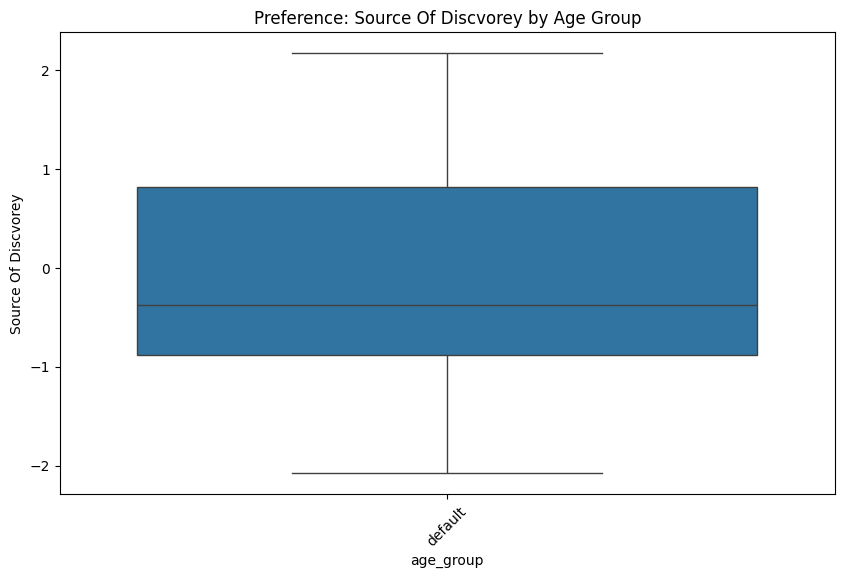

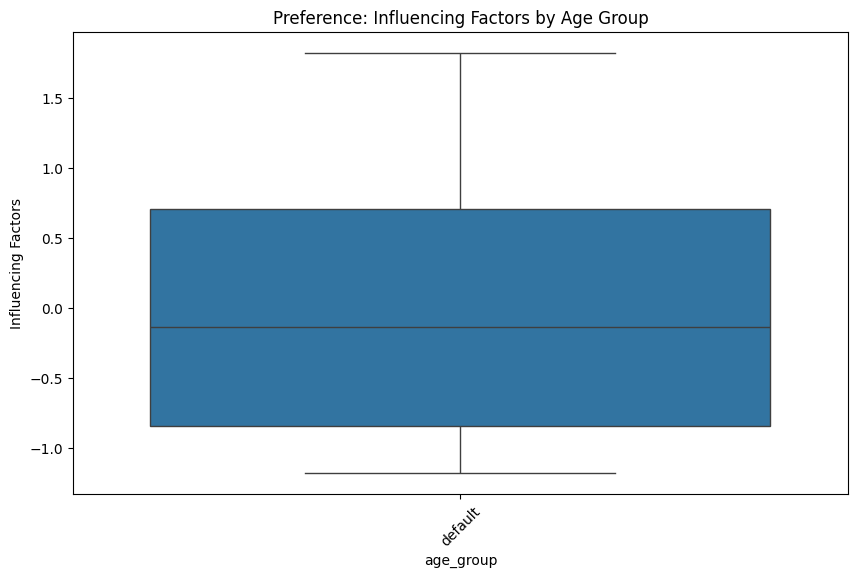

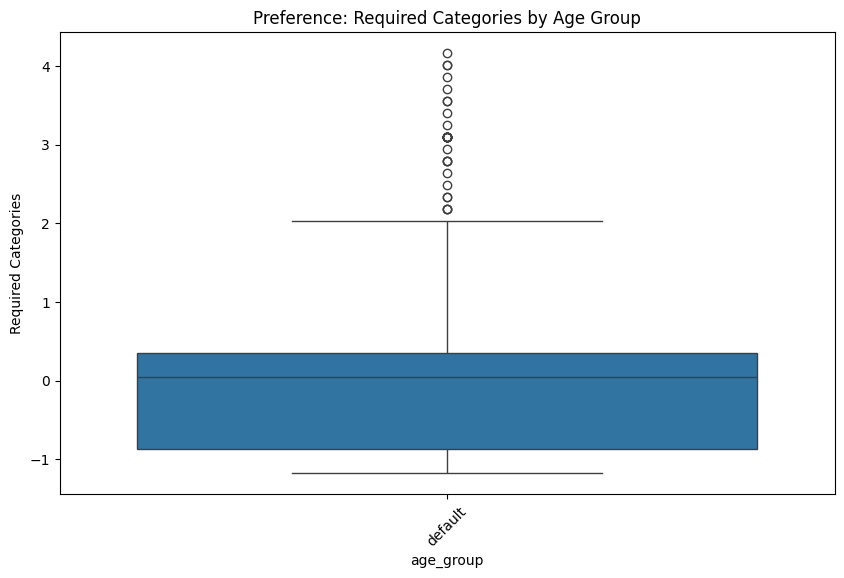

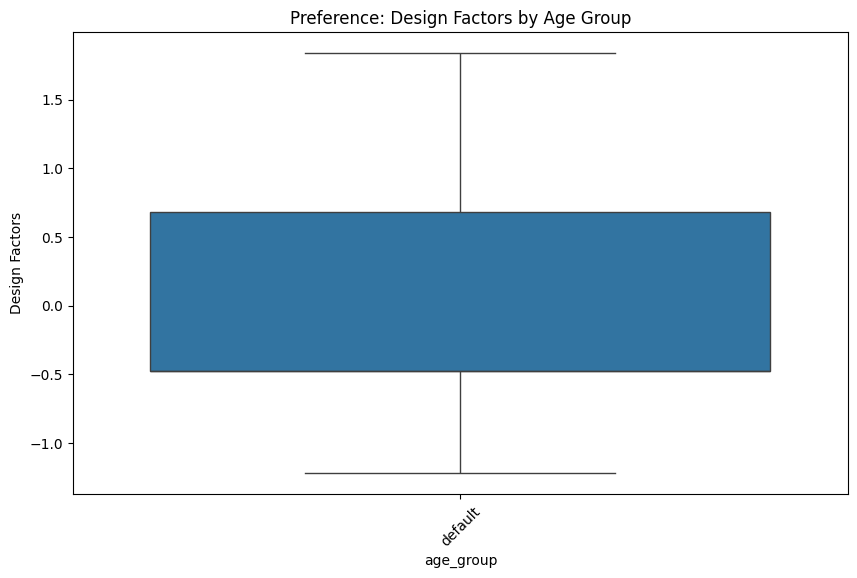

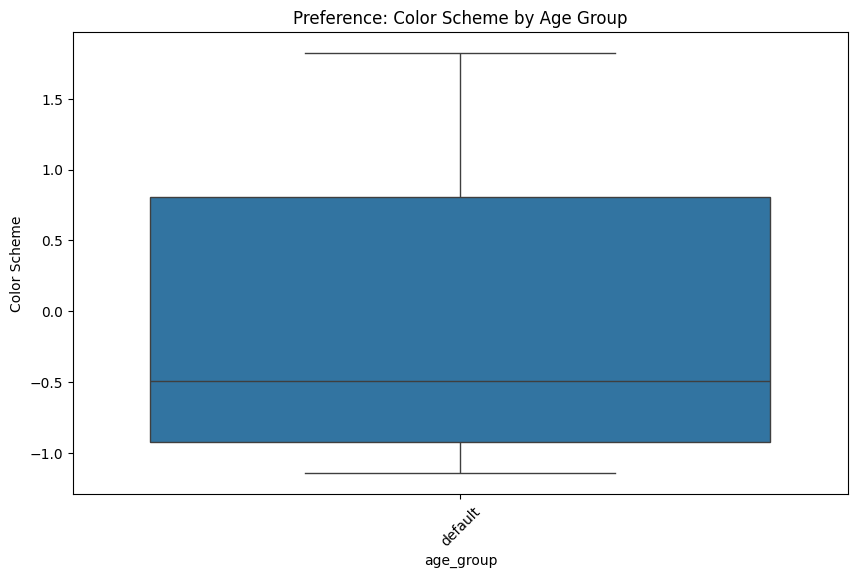

In [5]:
# Define age group function
def age_group(age):
    if age < 18:
        return 'under_18'
    elif 18 <= age <= 24:
        return '18-24'
    elif 25 <= age <= 34:
        return '25-34'
    elif 35 <= age <= 44:
        return '35-44'
    else:
        return 'default'

# Visualization of user preferences by age group
def visualize_preferences(df):
    df['age_group'] = df['Age'].apply(age_group)
    
    for pref in existing_preferences:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='age_group', y=pref, data=df)
        plt.title(f'Preference: {pref} by Age Group')
        plt.xticks(rotation=45)
        plt.show()

visualize_preferences(df)


# Define Layouts Based on Clusters, Age, and Gender

In [6]:
# Define layout mappings for age groups and genders
layout_mapping = {
    'under_18_male': 0,
    'under_18_female': 1,
    'default': 8,  # Use '8' as the default layout
    '18-24_male': 2,
    '18-24_female': 3,
    '25-34_male': 4,
    '25-34_female': 5,
    '35-44_male': 6,
    '35-44_female': 7
}

# Assign layouts based on age group and gender
def assign_layout(row):
    age_grp = age_group(row['Age'])
    if age_grp == 'default':
        return layout_mapping['default']
    else:
        key = f"{age_grp}_{row['Gender']}"
        return layout_mapping.get(key, 8)  # Default to 8 if not found

df['layout'] = df.apply(assign_layout, axis=1)

# Save the updated dataset
df.to_excel('updated_dataset.xlsx', index=False)


# Testing

In [7]:
def get_user_layout(age, gender):
    age_grp = age_group(age)
    if age_grp == 'default':
        return layout_mapping['default']
    else:
        key = f"{age_grp}_{gender}"
        return layout_mapping.get(key, 8)  # Default to 8 if not found

# Example usage
def test_layout_assignment(age, gender):
    layout_id = get_user_layout(age, gender)
    print(f"Age: {age}, Gender: {gender}, Assigned layout ID: {layout_id}")

# Test examples
test_layout_assignment(49, 'male')
test_layout_assignment(17, 'female')

Age: 49, Gender: male, Assigned layout ID: 8
Age: 17, Gender: female, Assigned layout ID: 1
